## Домашнее задание к лекции "Визуализация данных"

Обязательная часть\
Вам необходимо провести базовый EDA выбранного набора данных.

## Требования к анализу:

построить не менее 4 визуализаций различных видов;\
каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;\
по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).\
Откуда брать данные?

Можете взять свои рабочие данные, либо найти открытые данные (например, на kaggle.com) по интересующей вас предметной области (тогда не забудьте их выложить на github вместе с ноутбуком). Если идей нет, можете взять один из перечисленных ниже:

данные приложений из Google Play;\
данные о видео из трендов YouTube;\
данные об уровне счастья в разных странах.

## Долнительная часть (необязательная)

построить дополнительно не менее 2 визуализаций (итого не менее 6);\
в работе должны присутствовать следующие визуализации: boxplot, heatmap, scatter plot matrix;

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 13,6
import seaborn as sns
import datetime

In [2]:
YT = pd.read_csv('RUvideos.csv', encoding='utf-8', error_bad_lines=False)

b'Skipping line 1768: expected 16 fields, saw 20\nSkipping line 1977: expected 16 fields, saw 32\nSkipping line 4897: expected 16 fields, saw 25\nSkipping line 5744: expected 16 fields, saw 25\nSkipping line 6713: expected 16 fields, saw 25\nSkipping line 6755: expected 16 fields, saw 25\nSkipping line 7485: expected 16 fields, saw 25\nSkipping line 8961: expected 16 fields, saw 25\nSkipping line 17081: expected 16 fields, saw 25\nSkipping line 17428: expected 16 fields, saw 25\nSkipping line 18260: expected 16 fields, saw 25\nSkipping line 19139: expected 16 fields, saw 30\nSkipping line 19841: expected 16 fields, saw 25\nSkipping line 20708: expected 16 fields, saw 25\nSkipping line 29118: expected 16 fields, saw 25\n'
b'Skipping line 34314: expected 16 fields, saw 20\nSkipping line 35266: expected 16 fields, saw 25\nSkipping line 36450: expected 16 fields, saw 25\nSkipping line 36776: expected 16 fields, saw 25\nSkipping line 40127: expected 16 fields, saw 25\nSkipping line 40332: e

In [3]:
# Справочник категорий перевожу в дата фрейм для джойна
# Если был более простой вариант, то подскажите, пожалуйста
YT_cat_dict = {}
f = open('RU_category_id.json') 
data = json.load(f) 
for elem in data['items']:
    YT_cat_dict[elem['id']] = elem['snippet']['title']
YT_cat_dict
YT_cat_df = pd.DataFrame(list(YT_cat_dict.items()), columns = ['category_id', 'category_desc']).astype({'category_id': int}) 
YT_cat_df.head()

,category_id,category_desc
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports


In [4]:
YT = YT.merge(YT_cat_df, how='left', on='category_id')

In [5]:
YT1 = YT.loc[~YT['views'].str.contains('\D+', na=False)]\
        .loc[~YT['likes'].str.contains('\D+', na=False)]\
        .loc[~YT['dislikes'].str.contains('\D+', na=False)]\
        .loc[~YT['comment_count'].str.contains('\D+', na=False)]
YT1[['views', 'likes', 'dislikes', 'comment_count']] = YT1[['views', 'likes', 'dislikes', 'comment_count']].astype('int64')
# Лень по человечески переводить дату
YT1['period'] = YT1['trending_date'].apply(lambda x: '20' + x[0:2] + x[6:8])
YT1.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_desc,period
0,gDuslQ9avLc,17.14.11,Захар и Полина учатся экономить,Т—Ж БОГАЧ,22,2017-11-13T09:09:31.000Z,"захар и полина|""учимся экономить""|""копить день...",62408,334,190,50,https://i.ytimg.com/vi/gDuslQ9avLc/default.jpg,FALSE,FALSE,FALSE,"Знакомьтесь, это Захар и Полина. Вместе с ними...",People & Blogs,201711
1,AOCJIFEA_jE,17.14.11,Биржа Мемов #29. Большой выпуск,Druzhko Show,22,2017-11-13T17:32:11.000Z,"биржа мемов|""лев шагинян""|""мемы""|""пикчи""|""друж...",330043,43841,2244,2977,https://i.ytimg.com/vi/AOCJIFEA_jE/default.jpg,FALSE,FALSE,FALSE,"В 29 выпуске Дружко Шоу Сергей сказал, что Бир...",People & Blogs,201711
2,VAWNQDgwwOM,17.14.11,ХАЙП КЭМП - СВОЙ СРЕДИ ЧУЖИХ,Юлик,24,2017-11-13T16:11:31.000Z,"юмор|""комедия""|""влог""|""блог""|""смешно""|""смешное...",424596,49854,714,2944,https://i.ytimg.com/vi/VAWNQDgwwOM/default.jpg,FALSE,FALSE,FALSE,http://kapitany.ru/!Yulik.cap - Факультет #Кап...,Entertainment,201711
3,gknkFwKQfHg,17.14.11,Сочная кесадилья с курицей,Hochland,22,2017-11-13T06:51:10.000Z,"хохланд|""сыр""|""рецепты""|""как приготовить""|""вку...",112851,3566,122,80,https://i.ytimg.com/vi/gknkFwKQfHg/default.jpg,FALSE,FALSE,FALSE,*** как готовить ресторанные блюда дома,People & Blogs,201711
4,3sYvZcwzZr8,17.14.11,КЛИПЫ РОДИТЕЛЕЙ НА ШКОЛЬНЫЙ ВЫПУСКНОЙ,Совергон,24,2017-11-13T16:52:36.000Z,"Совергон|""Sovergon""|""клипы""|""родители""|""школа""...",243469,36216,631,1692,https://i.ytimg.com/vi/3sYvZcwzZr8/default.jpg,FALSE,FALSE,FALSE,❏ КОНКУРС КАПИТАНЫ: http://kapitany.ru/!Soverg...,Entertainment,201711


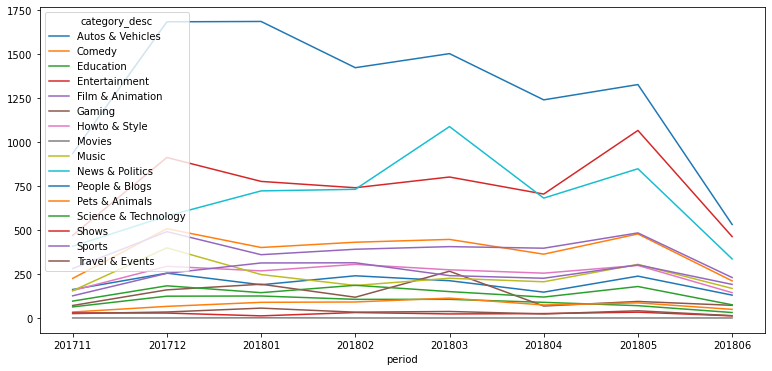

In [6]:
# Самые популярные категории по периодам
# Вижу рост интереса к политике в марте 2018
# 99% что это выборы, проверять я это конечно не буду
YT_category = YT1[['video_id', 'period', 'category_desc']].pivot_table(index='period', columns='category_desc', values='video_id', aggfunc='size', fill_value=0)
YT_category.plot()

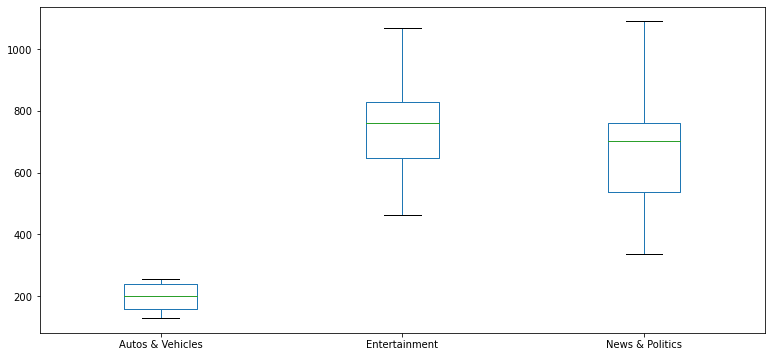

In [12]:
# По медиане можно увидеть что в категории новости и политика
# просмотры набирают большинство видео вне зависимости от канала
# в теории, поднять просмотров в этой категории проще чем в авто
YT_category[['Autos & Vehicles','Entertainment','News & Politics']].plot(kind='box')

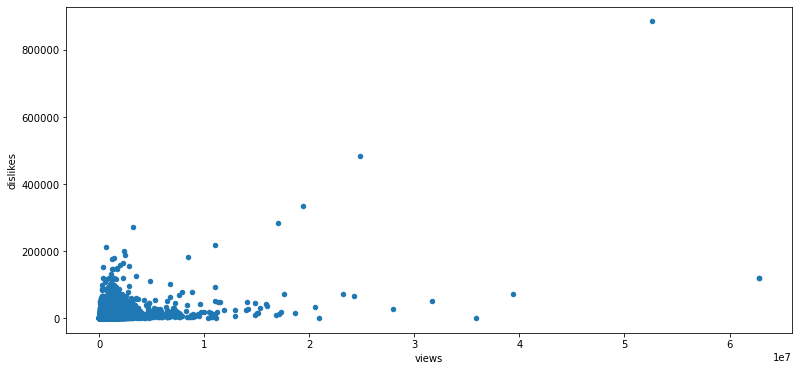

In [20]:
# Чем меньше дизлайков, тем больше просмотров
# Удивительно, ведь все говорят что черный пиар тоже пиар
# Видимо в 2017-2018 это было не так
YT1.plot(kind='scatter', x='views', y='dislikes')

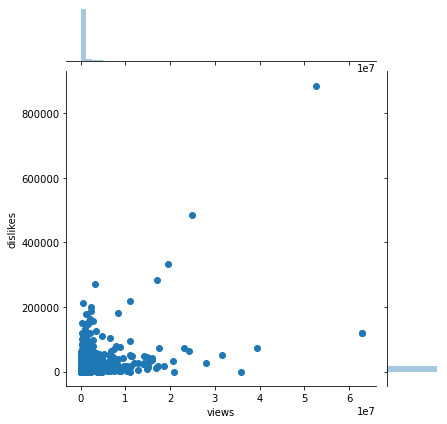

In [21]:
sns.jointplot(x='views', y='dislikes', 
              data=YT1, kind='scatter')

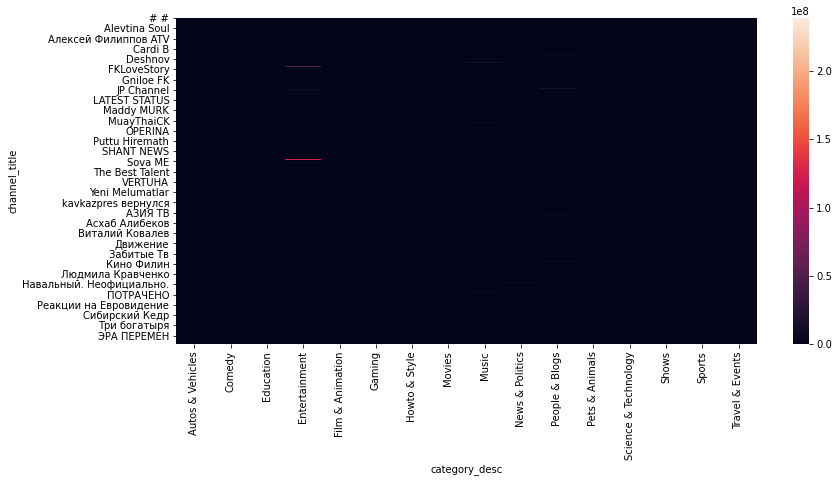

In [28]:
# Видим что только в Entertainment есть 1 канал который выделяется на фоне остальных по просмотрам
Top_channel_in_category = YT1[['views', 'channel_title', 'category_desc']].\
                          pivot_table(index='channel_title', columns='category_desc',\
                                      values='views', aggfunc='sum', fill_value=0)
sns.heatmap(Top_channel_in_category)

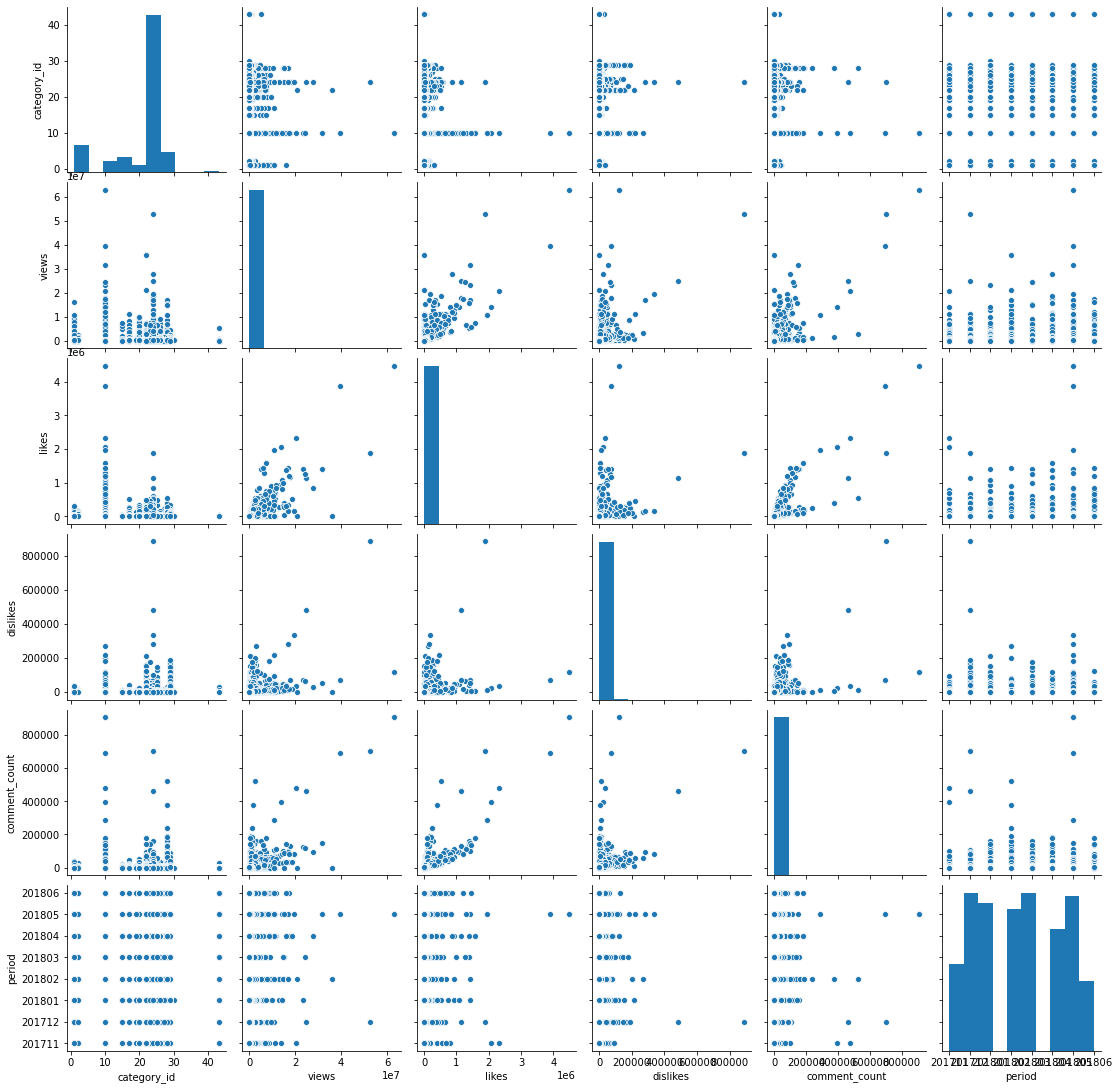

In [22]:
# Забавный момент у пересечения лайков и комментов
# Самые залайканные видео имеют минимум комментов
# Накрутка детектед
sns.pairplot(YT1)